#### This “Bad Drivers” dataset built by fivethirtyeight was based on National Highway Traffic Safety Administration data from 2009-2012 and though this data may be a bit on the older side, I think it may be an interesting dataset to analyze for a final project.  

This dataset contains the percentage of drivers involved in a fatal collision based on driver behaviors and arranged by state. Each state also contains insurance data including car insurance premiums and insurance losses from collisions per driver. 

Insurance companies make generally set premiums (and make money) using algorithmic risk assessments based on personal driver metrics, behaviors, and location. What I will look into here is if those states with higher insurance premiums tend to have more collisions and how does total mileage driven play into setting these premiums.

*Fivethirtyeight has a lot of interesting datasets so it is slightly possible that I may pick a different data set - who knows? :)

https://github.com/fivethirtyeight/data/tree/master/bad-drivers 

In [2]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("bad-drivers.csv")
df

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63
5,Colorado,13.6,37,28,79,95,835.50,139.91
6,Connecticut,10.8,46,36,87,82,1068.73,167.02
7,Delaware,16.2,38,30,87,99,1137.87,151.48
8,District of Columbia,5.9,34,27,100,100,1273.89,136.05
9,Florida,17.9,21,29,92,94,1160.13,144.18


In [4]:
df.loc[df['Number of drivers involved in fatal collisions per billion miles'].idxmax()]


State                                                                                                     North Dakota
Number of drivers involved in fatal collisions per billion miles                                                  23.9
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                                23
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                                        42
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                          99
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents              86
Car Insurance Premiums ($)                                                                                      688.75
Losses incurred by insurance companies for collisions per insured driver ($)                                    109.72
Name: 34, dtype: object

In [5]:
df.loc[df['Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding'].idxmax()]


State                                                                                                     Hawaii
Number of drivers involved in fatal collisions per billion miles                                            17.5
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                          54
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                                  41
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                    82
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents        87
Car Insurance Premiums ($)                                                                                861.18
Losses incurred by insurance companies for collisions per insured driver ($)                              120.92
Name: 11, dtype: object

In [6]:
df.loc[df['Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired'].idxmax()]


State                                                                                                     Montana
Number of drivers involved in fatal collisions per billion miles                                             21.4
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                           39
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                                   44
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                     84
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents         85
Car Insurance Premiums ($)                                                                                 816.21
Losses incurred by insurance companies for collisions per insured driver ($)                                85.15
Name: 26, dtype: object

In [7]:
df.loc[df['Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted'].idxmax()]


State                                                                                                     District of Columbia
Number of drivers involved in fatal collisions per billion miles                                                           5.9
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                                        34
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                                                27
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                                 100
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents                     100
Car Insurance Premiums ($)                                                                                             1273.89
Losses incurred by insurance companies for collisions per insured driver ($)                                   

In [8]:
df.loc[df['Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents'].idxmax()]


State                                                                                                     District of Columbia
Number of drivers involved in fatal collisions per billion miles                                                           5.9
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                                        34
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                                                27
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                                 100
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents                     100
Car Insurance Premiums ($)                                                                                             1273.89
Losses incurred by insurance companies for collisions per insured driver ($)                                   

In [9]:
df.loc[df['Car Insurance Premiums ($)'].idxmax()]


State                                                                                                     New Jersey
Number of drivers involved in fatal collisions per billion miles                                                11.2
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                              16
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                                      28
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                        86
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents            78
Car Insurance Premiums ($)                                                                                   1301.52
Losses incurred by insurance companies for collisions per insured driver ($)                                  159.85
Name: 30, dtype: object

In [10]:
df.loc[df['Losses incurred by insurance companies for collisions per insured driver ($)'].idxmax()]


State                                                                                                     Louisiana
Number of drivers involved in fatal collisions per billion miles                                               20.5
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                             35
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                                     33
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                       73
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents           98
Car Insurance Premiums ($)                                                                                  1281.55
Losses incurred by insurance companies for collisions per insured driver ($)                                 194.78
Name: 18, dtype: object

In [11]:
df.loc[df['Number of drivers involved in fatal collisions per billion miles'].idxmin()]


State                                                                                                     District of Columbia
Number of drivers involved in fatal collisions per billion miles                                                           5.9
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                                        34
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                                                27
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                                 100
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents                     100
Car Insurance Premiums ($)                                                                                             1273.89
Losses incurred by insurance companies for collisions per insured driver ($)                                   

In [12]:
df['Cost of Insurance per $ paid out'] = df['Car Insurance Premiums ($)'] / df['Losses incurred by insurance companies for collisions per insured driver ($)']


In [13]:
df

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Cost of Insurance per $ paid out
0,Alabama,18.8,39,30,96,80,784.55,145.08,5.407706
1,Alaska,18.1,41,25,90,94,1053.48,133.93,7.865900
2,Arizona,18.6,35,28,84,96,899.47,110.35,8.151065
3,Arkansas,22.4,18,26,94,95,827.34,142.39,5.810380
4,California,12.0,35,28,91,89,878.41,165.63,5.303447
5,Colorado,13.6,37,28,79,95,835.50,139.91,5.971696
6,Connecticut,10.8,46,36,87,82,1068.73,167.02,6.398815
7,Delaware,16.2,38,30,87,99,1137.87,151.48,7.511685
8,District of Columbia,5.9,34,27,100,100,1273.89,136.05,9.363396
9,Florida,17.9,21,29,92,94,1160.13,144.18,8.046400


In [14]:
new_df = df[['Number of drivers involved in fatal collisions per billion miles', 'Car Insurance Premiums ($)']].copy()

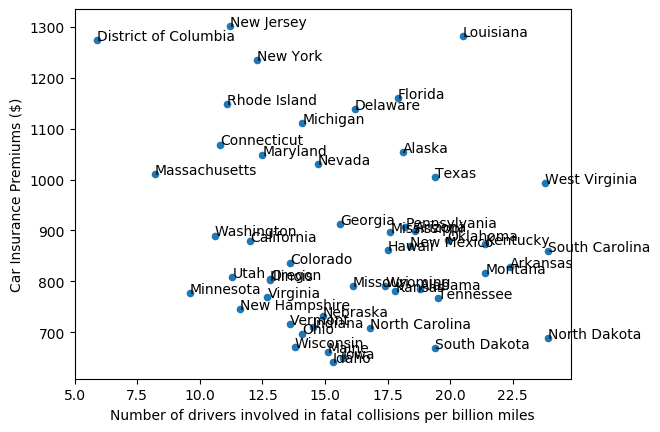

In [15]:
ax = df.plot(kind='scatter',
             x='Number of drivers involved in fatal collisions per billion miles',
             y='Car Insurance Premiums ($)')
df[['Number of drivers involved in fatal collisions per billion miles','Car Insurance Premiums ($)','State']].apply(lambda row: ax.text(*row),axis=1);
plt.show()

In [1]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
new_df.plot(
    'Number of drivers involved in fatal collisions per billion miles', 
    'Car Insurance Premiums ($)', kind='scatter', ax=ax, s=120, linewidth=0, 
        c=range(len(df)), colormap=cmap)

for k, v in df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')

NameError: name 'new_df' is not defined